In [519]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [520]:
df = pd.read_csv("titanic/train.csv")
df.head(n=13)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [521]:
dftest = pd.read_csv("titanic/test.csv")

In [522]:
dftest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [524]:
corr_matrix = df[df.columns].corr()

<AxesSubplot:>

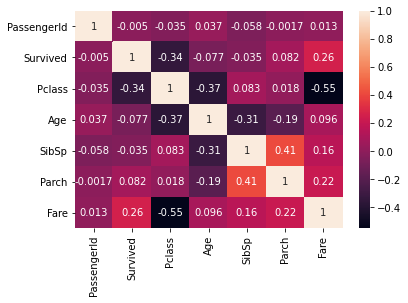

In [525]:
sns.heatmap(corr_matrix, annot=True)

In [526]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [527]:
missing_perc = (df.isnull().sum() / len(df))*100
missing_val_cols = missing_perc[missing_perc > 0]

In [528]:
missing_val_cols.sort_values()

Embarked     0.224467
Age         19.865320
Cabin       77.104377
dtype: float64

In [529]:
missing_val_cols[missing_val_cols > 60].index

Index(['Cabin'], dtype='object')

In [530]:
df.drop(missing_val_cols[missing_val_cols > 60].index, axis = 1, inplace =True )

In [531]:
dftest.drop(missing_val_cols[missing_val_cols > 60].index, axis = 1, inplace =True )

In [532]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [533]:
def bar_chart(feature):
    survived = df[df['Survived']==1.0][feature].value_counts()
    dead = df[df['Survived']==0.0][feature].value_counts()
    tdf = pd.DataFrame([survived,dead])
    tdf.index = ['Survived','Dead']
    tdf.plot(kind='bar',stacked=True, figsize=(10,5))

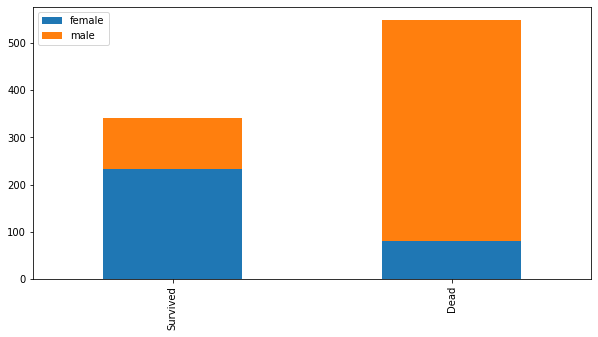

In [534]:
bar_chart('Sex')

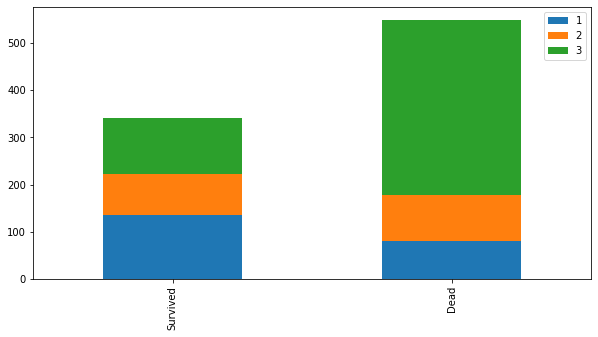

In [535]:
bar_chart('Pclass')

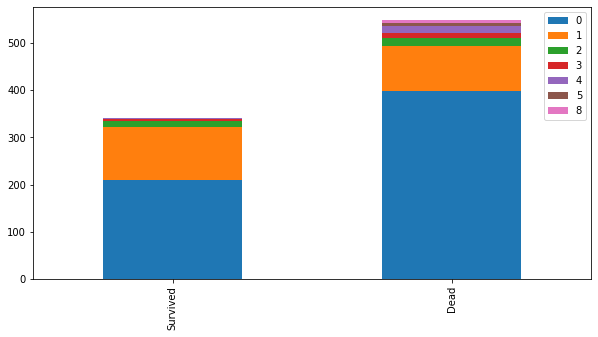

In [536]:
bar_chart('SibSp')

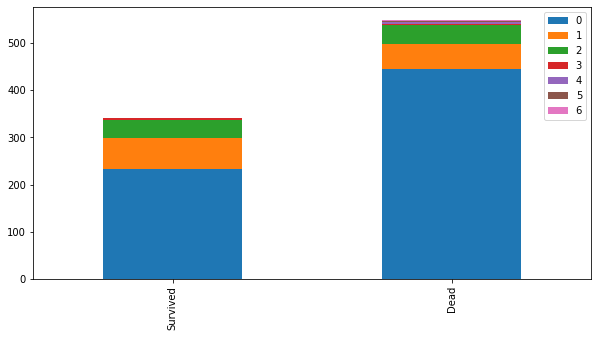

In [537]:
bar_chart('Parch')

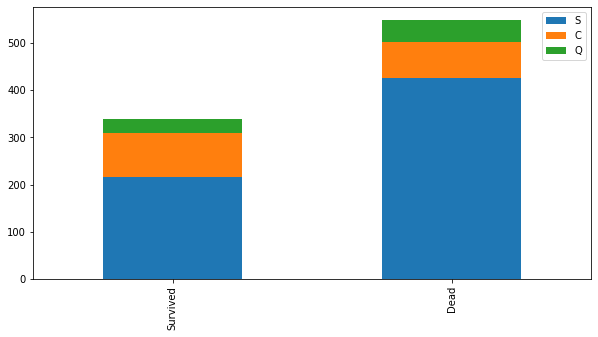

In [538]:
bar_chart('Embarked')

In [539]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, minimal=True)

In [540]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

In [541]:
prof

In [542]:
columns_to_drop = ["PassengerId", "Ticket"]

In [543]:
data_clean = df.drop(columns_to_drop,axis = 1)

In [544]:
dfTest_clean = dftest.drop(columns_to_drop,axis = 1)

In [545]:
data_clean.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


<AxesSubplot:>

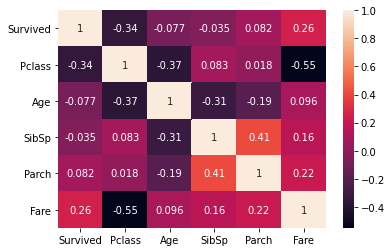

In [546]:
corr_matrix = data_clean[data_clean.columns].corr()

sns.heatmap(corr_matrix, annot=True)

In [547]:
## create new column called title

In [548]:
data_clean['Title']  = [name.split(', ')[1].split('.')[0] for name in data_clean.Name]

In [549]:
data_clean['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Don               1
Mme               1
Ms                1
Jonkheer          1
Capt              1
Sir               1
the Countess      1
Lady              1
Name: Title, dtype: int64

In [550]:
dfTest_clean['Title']  = [name.split(', ')[1].split('.')[0] for name in dfTest_clean.Name]

In [551]:
dfTest_clean['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [552]:
## converting similar upper class titles to Noble

In [553]:
data_clean.Title.loc[data_clean.Title.isin(['Major','Capt','Jonkheer', 'Don','Sir'])] = 'Noble'

c:\users\linta.kumar\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [554]:
dfTest_clean.Title.loc[dfTest_clean.Title.isin(['Major','Capt','Jonkheer', 'Don','Sir'])] = 'Noble'

In [555]:
## converting similar upper class titles for ladies to NobleLady

In [556]:
data_clean.Title.loc[data_clean.Title.isin(['Lady','the Countess', 'Dona'])] = 'NobleLady'
dfTest_clean.Title.loc[dfTest_clean.Title.isin(['Lady','the Countess', 'Dona'])] = 'NobleLady'

In [557]:
data_clean['Title'].value_counts()

Mr           517
Miss         182
Mrs          125
Master        40
Dr             7
Noble          6
Rev            6
Col            2
Mlle           2
NobleLady      2
Ms             1
Mme            1
Name: Title, dtype: int64

In [558]:
data_clean.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [559]:
print(data_clean.columns.tolist())

['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title']


In [560]:
data_clean.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [513]:
## find correlated column with Title
corr_df = data_clean
corr_df['Title'] = corr_df['Title'].astype('category').cat.codes
corr_matrix = corr_df.corr()
print(corr_matrix["Title"].sort_values(ascending=False))  ## highly correalted to Fare

Title       1.000000
Age         0.438056
Pclass     -0.059431
Fare       -0.080344
Parch      -0.155977
Survived   -0.223730
SibSp      -0.226878
Name: Title, dtype: float64


In [496]:
# the correaltion with survived is very less for Title .So lets just try to make new features with this

<AxesSubplot:>

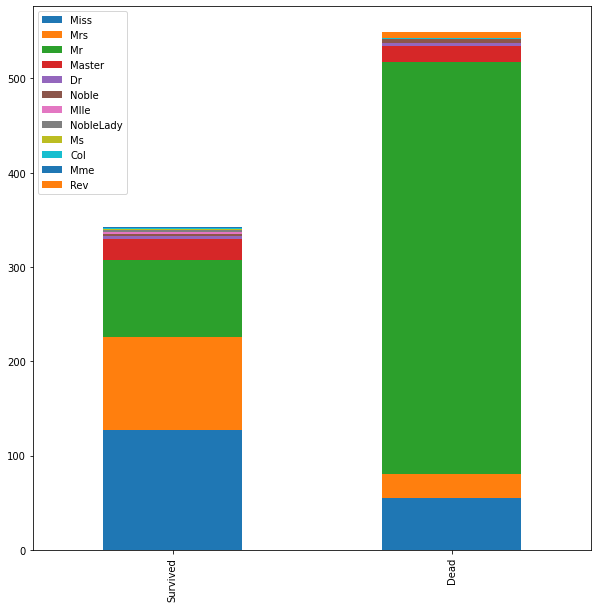

In [562]:
survived = data_clean[data_clean['Survived']==1.0]['Title'].value_counts()
dead = data_clean[data_clean['Survived']==0.0]['Title'].value_counts()
tdf = pd.DataFrame([survived,dead])
tdf.index = ['Survived','Dead']
tdf.plot(kind='bar',stacked=True, figsize=(10,10))

In [ ]:
## I dont see much value in keeping this column since we already have Sex column. So lets drop it

In [563]:
data_clean.drop('Title',axis = 1, inplace=True)

In [564]:
dfTest_clean.drop('Title',axis = 1, inplace=True)

In [565]:
## Embarked column - Handle missing values

In [566]:
data_clean["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [567]:
## what is the column with max correlation to Embarked?

In [568]:
corrdf = data_clean

In [569]:
corrdf['Embarked']=corrdf['Embarked'].astype('category').cat.codes
corrdf.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.176509
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.173511
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.044830
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.071480
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.043351
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.230365
Embarked,-0.176509,0.173511,-0.044830,0.071480,0.043351,-0.230365,1.000000


In [570]:
# Pclass seems to be the one that is highly correlated with Embarked
# but since it is less than .30 there is only a very small correlation
# let's fill Embarked column with the most frequent value value

In [571]:
data_clean['Embarked'].fillna('S', inplace=True)

In [572]:
dfTest_clean['Embarked'].fillna('S', inplace=True)

In [573]:
data_clean['Embarked'].isnull().sum()

0

In [574]:
dfTest_clean['Embarked'].isnull().sum()

0

In [575]:
## Embarked 

In [576]:
## Prepare Data

In [577]:
## Lets do some label encoding using sklearn

In [578]:
from sklearn.preprocessing import LabelEncoder

In [579]:
le = LabelEncoder()
data_clean["Sex"] = le.fit_transform(data_clean["Sex"])

In [580]:
dfTest_clean["Sex"] = le.fit_transform(dfTest_clean["Sex"])

In [581]:
le2 = LabelEncoder()
data_clean["Embarked"] = le2.fit_transform(data_clean["Embarked"])
dfTest_clean["Embarked"] = le2.fit_transform(dfTest_clean["Embarked"])

In [582]:
data_clean.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,3
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,3
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,3
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,3


In [583]:
data_clean.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [584]:
data_clean['Age'] = data_clean['Age'].fillna((data_clean['Age'].mean()))

In [585]:
dfTest_clean['Age'] = dfTest_clean['Age'].fillna((data_clean['Age'].mean()))

In [586]:
dfTest_clean['Fare'] = dfTest_clean['Fare'].fillna((data_clean['Fare'].mean()))

In [587]:
data_clean.columns[data_clean.isna().any()].tolist()

[]

In [588]:
dfTest_clean.columns[dfTest_clean.isna().any()].tolist()

[]

In [589]:
data_clean.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,3
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,3
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,3
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,3


In [297]:
#leTitle = LabelEncoder()

In [298]:
#data_clean["Title"] = leTitle.fit_transform(data_clean["Title"])

In [299]:
#dfTest_clean["Title"] = leTitle.fit_transform(dfTest_clean["Title"])

In [590]:
data_clean.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [591]:
dfTest_clean.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [592]:
# drop name column

In [593]:
data_clean.drop('Name',axis = 1, inplace=True)

In [594]:
dfTest_clean.drop('Name',axis = 1, inplace=True)

In [595]:
data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,3
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,3
3,1,1,0,35.0,1,0,53.1000,3
4,0,3,1,35.0,0,0,8.0500,3


In [596]:
data_clean.columns[data_clean.columns != 'Survived']

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [597]:
input_columns = data_clean.columns[data_clean.columns != 'Survived']
output_columns = ["Survived"]

In [598]:
X = data_clean[input_columns]
Y = data_clean[output_columns]

In [599]:
X = X.values
Y = Y.values

In [600]:
Y = Y.ravel()

In [601]:
print(X.shape, Y.shape)

(891, 7) (891,)


In [602]:
X_test = dfTest_clean.values

In [603]:
from sklearn.model_selection import train_test_split

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,  test_size = 0.2, random_state = 42)

In [604]:
print(X_train.shape)
print(X_validation.shape)
print(Y_train.shape)
print(Y_validation.shape)

(712, 7)
(179, 7)
(712,)
(179,)


In [605]:
from sklearn.ensemble import RandomForestClassifier

In [628]:
param_grid = { "criterion" : ["entropy"], "max_depth" : [3, 5, 7, 10], "n_estimators": [20,25,30,50,100]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=20, max_features='auto')
clf = GridSearchCV(estimator=rf, param_grid=param_grid)
clf.fit(X_train, Y_train)
clf.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 30}

In [630]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "entropy", max_depth = 5, n_estimators=30)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_validation)

random_forest.score(X_validation, Y_validation)

0.8268156424581006

In [631]:
YPredForest = random_forest.predict(X_test)

In [632]:
YPredForest.shape

(418,)

In [633]:
df = pd.DataFrame(data=YPredForest, columns=["Survived"])
df.index.name='PassengerId'
df.head()
df.to_csv('rdfPredictions.csv')